In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

In [35]:
df_ic = pd.read_csv('ice_cream.csv')

In [36]:
df_ic.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [37]:
df_ic.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [38]:
df_ic['date'] = pd.to_datetime(df_ic['date'])
df_ic.set_index('date', inplace=True)

In [39]:
df_ic.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [40]:
start_date = pd.to_datetime('2010-01-01')
df_ic = df_ic[start_date:]

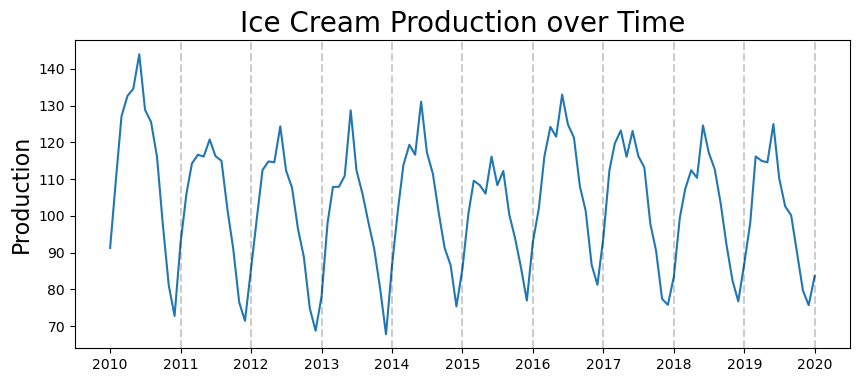

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(df_ic.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

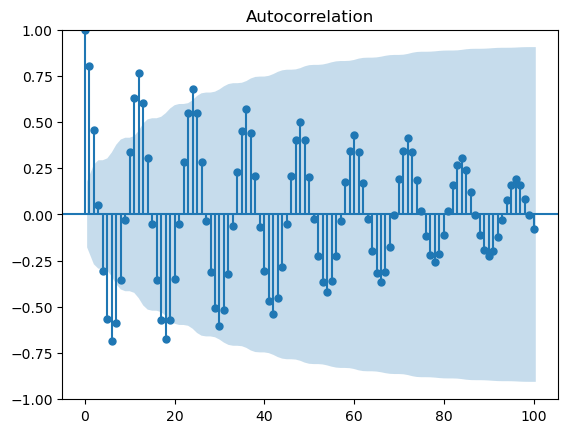

In [42]:
acf_plot = plot_acf(df_ic.production, lags=100)

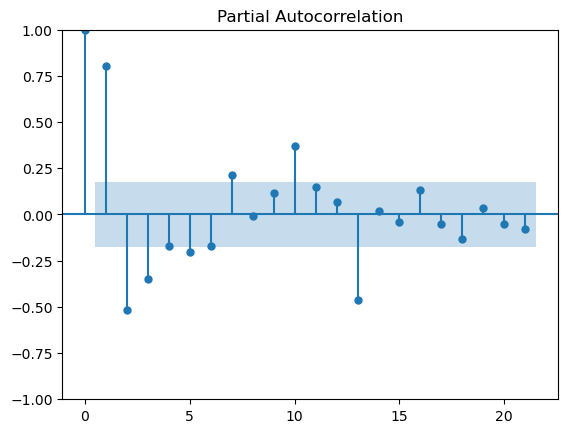

In [43]:
pacf_plot = plot_pacf(df_ic.production)

In [44]:
#Stationarity test - dicky fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_ic.production)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


(-3.4692068038611397, 0.008814055324487138, 13, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, 623.01260175485)
ADF Statistic: -3.469207
p-value: 0.008814


In [50]:
## Trying an AR model

from statsmodels.tsa.arima.model import ARIMA

df_ic.production = df_ic.production.asfreq(pd.infer_freq(df_ic.production.index))


In [46]:
train_end = datetime(2017,12,1)
test_end = datetime(2019,12,1)

In [47]:
train_data = df_ic.production[:train_end]
test_data = df_ic.production[train_end + pd.DateOffset(days=1):test_end]

In [61]:
model = ARIMA(train_data, order=(14,0,0))
model_fit = model.fit()
model_fit.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                   96
Model:                ARIMA(14, 0, 0)   Log Likelihood                -277.084
Date:                Wed, 29 Jan 2025   AIC                            586.167
Time:                        02:18:42   BIC                            627.197
Sample:                    01-01-2010   HQIC                           602.752
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.1911      1.654     63.010      0.000     100.950     107.432
ar.L1          0.8086      0.140      5.787      0.000       0.535       1.082
ar.L2          0.0953      0.165      0.577      0.564      -0.228       0.419
ar.L3         -0.2104      0.116     -1.810      0.070      -0.438       0.017
ar.L4          0.1252      0.141      0.887      0.375      -0.151       0.402
ar.L5          0.0423      0.147      0.288      0.774      -0.246       0.331
ar.L6         -0.2472      0.116     -2.122      0.034      -0.475      -0.019
ar.L7          0.1330      0.139      0.959      0.338      -0.139       0.405
ar.L8          0.0066      0.149      0.044      0.965      -0.286       0.299
ar.L9         -0.1934      0.114     -1.699      0.089      -0.417       0.030
ar.L10         0.1412      0.123      1.144      0.253      -0.101       0.383
ar.L11         0.0418      0.132      0.316      0.752      -0.217       0.301
ar.L12         0.6304      0.116      5.445      0.000       0.404       0.857
ar.L13        -0.5293      0.147     -3.602      0.000      -0.817      -0.241
ar.L14        -0.1328      0.147     -0.903      0.367      -0.421       0.156
sigma2        15.6613      2.932      5.341      0.000       9.914      21.409
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.09
Prob(Q):                              0.69   Prob(JB):                         0.35
Heteroskedasticity (H):               0.80   Skew:                             0.36
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [63]:
pred = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - pred

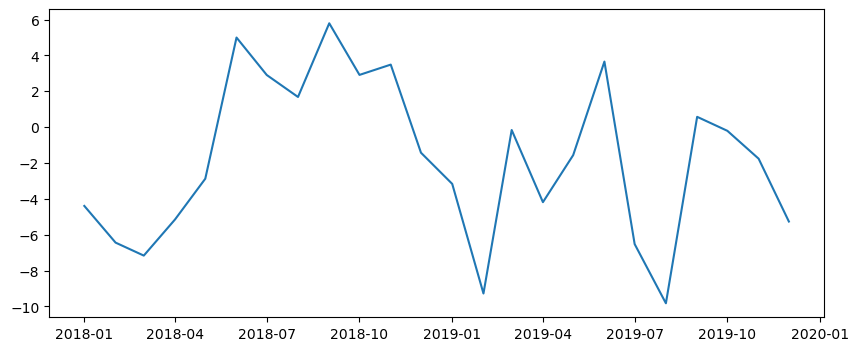

In [64]:
plt.figure(figsize=(10,4))
plt.plot(residuals, label='Residuals')

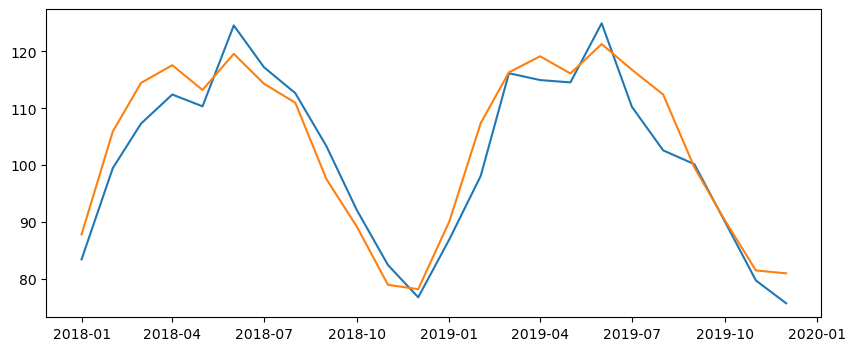

In [65]:
plt.figure(figsize=(10, 4))
plt.plot(test_data, label='Data')
plt.plot(pred, label='Prediction')


In [67]:
#Mean absolute percentage error
mape = np.mean(np.abs(residuals/test_data))
mape

0.03960654910714508

In [ ]:
### Rolling forecast AR model

